In [86]:
import cv2 as cv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

global basedir,labels_file

testdir='.\\test'#direction for test dataset
basedir='.\\dataset'#direction for training dataset
labels_file='label.csv'#direction for labels

In [87]:
def data_preprocess(datadir):#to reduce size of pictures and extract labels
    images_dir = os.path.join(datadir,'image')#compelte image direction
    image_paths=[os.path.join(images_dir,num)for num in os.listdir(images_dir)]#locate positon of datset

    if os.path.isdir(images_dir):
            all_img=[]
            labels_file_position = pd.read_csv(os.path.join(datadir,labels_file))#extract labels details
            all_labels=labels_file_position['label'].tolist()#switch dataframe to list form
            for image_path in image_paths:
                img=cv.imread(image_path,0)
                img_down=cv.pyrDown(img)#reduce image size to 256*256
                img_down_down=cv.pyrDown(img_down)#reduce image size to 128*128
                all_img.append(img_down_down)#gain all images
    return all_img,all_labels#return details of images and labels


## Train Binary&Multiclass Model Using SVM

In [88]:
def binary_split(datadir):#for task 1
    x,y=data_preprocess(datadir)
    processed_labels=[]
    
    for index in range (np.array(y).size):
        if y[index]=='no_tumor':
            processed_labels.append(0)#0 stands for no_tumor labels
        else:
            processed_labels.append(1)#1 stands for other labels
    return np.array(x),np.array(processed_labels)#return 1.array of image details    2.array of 0 and 1.

def multiple_split(datadir):#for task 2
    x,y=data_preprocess(datadir)
    processed_labels=[]
    
    for index in range (np.array(y).size):
        if y[index]=='no_tumor':
            processed_labels.append(0)#0 stands for no_tumor labels
        elif y[index]=='meningioma_tumor':
            processed_labels.append(1)#1 stands for meningioma_tumor labels
        elif y[index]=='glioma_tumor':
            processed_labels.append(2)#2 stands for glioma_tumor labels
        elif y[index]=='pituitary_tumor':
            processed_labels.append(3)#3 stands for pituitary_tumor labels
    return np.array(x),np.array(processed_labels)#return 1.array of image details    2.array of 0,1,2,3.

In [89]:
def B_split_data():#binary-split task
    tr_X, y = binary_split(basedir)#extract images details and label numbers
    tr_Y = np.array([y, -(y - 1)]).T#transpose
    
    te_X, y_t = binary_split(testdir)#extract images details and label numbers
    te_Y = np.array([y_t, -(y_t - 1)]).T#transpose
    return tr_X, tr_Y, te_X, te_Y#return 4 basic datasets

def M_split_data():#multiclass-split task
    tr_X, y = multiple_split(basedir)#extract images details and label numbers
    tr_Y = np.array([y, -(y - 1)]).T#transpose
    
    te_X, y_t = multiple_split(testdir)#extract images details and label numbers
    te_Y = np.array([y_t, -(y_t - 1)]).T#transpose
    return tr_X, tr_Y, te_X, te_Y#return 4 basic datasets

In [90]:
def img_SVM(training_images, training_labels, test_images, test_labels):#for SVM model
    classifier = svm.SVC(kernel='linear')#use linear instead of other kernels
    classifier.fit(training_images, training_labels)#training model
    pred = classifier.predict(test_images)#make prediction
    #print(pred)
    print("Accuracy:", accuracy_score(test_labels, pred))#show results

## Train&Validate Binary&Multiclass Model Using SVM

In [91]:
def train_B():
    X, y = binary_split(basedir)#extract images details and label numbers
    Y = np.array([y, -(y - 1)]).T#transpose
    tr_X=X[:2250]
    tr_Y=Y[:2250]
    te_X=X[:500]
    te_Y=Y[:500]#split training set and validation set
    return tr_X,tr_Y,te_X,te_Y#return 4 basic datasets

In [92]:
def train_M():
    X, y = multiple_split(basedir)#extract images details and label numbers
    Y = np.array([y, -(y - 1)]).T#transpose
    tr_X=X[:2250]
    tr_Y=Y[:2250]
    te_X=X[:500]
    te_Y=Y[:500]#split training set and validation set
    return tr_X,tr_Y,te_X,te_Y#return 4 basic datasets

In [93]:
def validate_B():
    X, y = binary_split(basedir)#extract images details and label numbers
    Y = np.array([y, -(y - 1)]).T#transpose
    tr_X=X[:2250]
    tr_Y=Y[:2250]
    te_X=X[2250:]
    te_Y=Y[2250:]#split training set and validation set
    return tr_X,tr_Y,te_X,te_Y#return 4 basic datasets

In [94]:
def validate_M():
    X, y = multiple_split(basedir)#extract images details and label numbers
    Y = np.array([y, -(y - 1)]).T#transpose
    tr_X=X[:2250]
    tr_Y=Y[:2250]
    te_X=X[2250:]
    te_Y=Y[2250:]#split training set and validation set
    return tr_X,tr_Y,te_X,te_Y#return 4 basic datasets

In [95]:
tr_X, tr_Y, te_X, te_Y=train_B()
img_SVM(tr_X.reshape((2250,128*128)),list(zip(*tr_Y))[0],te_X.reshape((500,128*128)),list(zip(*te_Y))[0])

Accuracy: 1.0


In [96]:
tr_X, tr_Y, te_X, te_Y=train_M()
img_SVM(tr_X.reshape((2250,128*128)),list(zip(*tr_Y))[0],te_X.reshape((500,128*128)),list(zip(*te_Y))[0])

Accuracy: 1.0


In [97]:
tr_X, tr_Y, te_X, te_Y=validate_B()
img_SVM(tr_X.reshape((2250,128*128)),list(zip(*tr_Y))[0],te_X.reshape((750,128*128)),list(zip(*te_Y))[0])

Accuracy: 0.944


In [98]:
tr_X, tr_Y, te_X, te_Y=validate_M()
img_SVM(tr_X.reshape((2250,128*128)),list(zip(*tr_Y))[0],te_X.reshape((750,128*128)),list(zip(*te_Y))[0])

Accuracy: 0.8173333333333334


## Test Binary&Multiclass Model Using SVM

In [99]:
tr_X, tr_Y, te_X, te_Y=B_split_data()
img_SVM(tr_X.reshape((3000,128*128)),list(zip(*tr_Y))[0],te_X.reshape((200,128*128)),list(zip(*te_Y))[0])

Accuracy: 0.93


In [100]:
tr_X, tr_Y, te_X, te_Y=M_split_data()
img_SVM(tr_X.reshape((3000,128*128)),list(zip(*tr_Y))[0],te_X.reshape((200,128*128)),list(zip(*te_Y))[0])

Accuracy: 0.805


In [101]:
def test_SVM(training_images, training_labels, test_images, test_labels):#for SVM model
    kernal_set=['linear','poly','sigmoid','rbf']
    for kernal_try in kernal_set:
        classifier = svm.SVC(kernel=kernal_try)#use linear instead of other kernels
        classifier.fit(training_images, training_labels)#training model
        pred = classifier.predict(test_images)#make prediction
        #print(pred)
        print(kernal_try,"kernel accuracy:", accuracy_score(test_labels, pred))#show results

In [102]:
tr_X, tr_Y, te_X, te_Y=M_split_data()
test_SVM(tr_X.reshape((3000,128*128)),list(zip(*tr_Y))[0],te_X.reshape((200,128*128)),list(zip(*te_Y))[0])

linear kernel accuracy: 0.805
poly kernel accuracy: 0.865
sigmoid kernel accuracy: 0.365
rbf kernel accuracy: 0.84


In [103]:
tr_X, tr_Y, te_X, te_Y=B_split_data()
test_SVM(tr_X.reshape((3000,128*128)),list(zip(*tr_Y))[0],te_X.reshape((200,128*128)),list(zip(*te_Y))[0])

linear kernel accuracy: 0.93
poly kernel accuracy: 0.945
sigmoid kernel accuracy: 0.705
rbf kernel accuracy: 0.925


## Train Binary&Multiclass Model Using KNN

In [104]:
def KNN_Classifier(X_train, y_train, X_test,k):#for Knn model
    neigh = KNeighborsClassifier(n_neighbors=k)#classify data
    neigh.fit(X_train, y_train) # Fit KNN model
    Y_pred = neigh.predict(X_test)
    return Y_pred#return prediction

In [105]:
def KNN_Kcompare_M():#for multiclass-split task
    tr_X, tr_Y, te_X, te_Y=M_split_data()
    score_list=[]
    for i in range(1,36):
        knn = KNeighborsClassifier(n_neighbors=i)#classify data
        knn.fit(tr_X.reshape((3000,128*128)),list(zip(*tr_Y))[0])#train model 
        pred_i = knn.predict(te_X.reshape((200,128*128)))#make prediction using test datasets
        score_list.append(metrics.accuracy_score(list(zip(*te_Y))[0],pred_i))
    plt.plot(range(1,36),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
    plt.title("Accuracy vs. K Value (Multiclass)")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.show()#make a chart to show the results
    
def KNN_Kcompare_B():#for binary-split task
    tr_X, tr_Y, te_X, te_Y=B_split_data()
    score_list=[]
    for i in range(1,36):
        knn = KNeighborsClassifier(n_neighbors=i)#classify data
        knn.fit(tr_X.reshape((3000,128*128)),list(zip(*tr_Y))[0])#train model 
        pred_i = knn.predict(te_X.reshape((200,128*128)))#make prediction using test datasets
        score_list.append(metrics.accuracy_score(list(zip(*te_Y))[0],pred_i))
    plt.plot(range(1,36),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
    plt.title("Accuracy vs. K Value (Binary)")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.show()#make a chart to show the results

## Train&Validate Binary&Multiclass Model Using KNN

In [106]:
tr_X, tr_Y, te_X, te_Y=train_B()
Y_pred=KNN_Classifier(tr_X.reshape((2250,128*128)),list(zip(*tr_Y))[0],te_X.reshape((500,128*128)),5)
score=metrics.accuracy_score(list(zip(*te_Y))[0],Y_pred)
print(score)

0.95


In [107]:
tr_X, tr_Y, te_X, te_Y=train_M()
Y_pred=KNN_Classifier(tr_X.reshape((2250,128*128)),list(zip(*tr_Y))[0],te_X.reshape((500,128*128)),5)
score=metrics.accuracy_score(list(zip(*te_Y))[0],Y_pred)
print(score)

0.86


In [108]:
tr_X, tr_Y, te_X, te_Y=validate_B()
Y_pred=KNN_Classifier(tr_X.reshape((2250,128*128)),list(zip(*tr_Y))[0],te_X.reshape((750,128*128)),5)
score=metrics.accuracy_score(list(zip(*te_Y))[0],Y_pred)
print(score)

0.9066666666666666


In [109]:
tr_X, tr_Y, te_X, te_Y=validate_M()
Y_pred=KNN_Classifier(tr_X.reshape((2250,128*128)),list(zip(*tr_Y))[0],te_X.reshape((750,128*128)),5)
score=metrics.accuracy_score(list(zip(*te_Y))[0],Y_pred)
print(score)

0.748


## Test Binary&Multiclass Model Using KNN

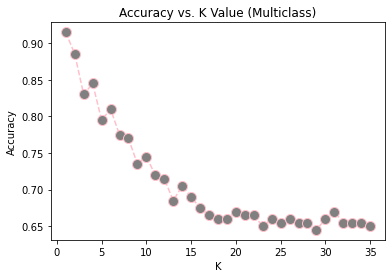

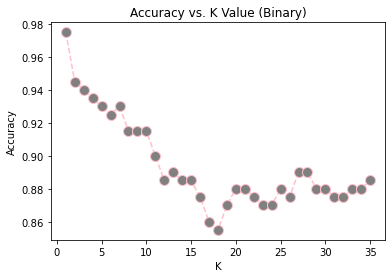

In [15]:
KNN_Kcompare_M()
KNN_Kcompare_B()

The best K should be 1

In [11]:
tr_X, tr_Y, te_X, te_Y=B_split_data()
Y_pred=KNN_Classifier(tr_X.reshape((3000,128*128)),list(zip(*tr_Y))[0],te_X.reshape((200,128*128)),1)
score=metrics.accuracy_score(list(zip(*te_Y))[0],Y_pred)
print(score)

0.975


In [10]:
tr_X, tr_Y, te_X, te_Y=M_split_data()
Y_pred=KNN_Classifier(tr_X.reshape((3000,128*128)),list(zip(*tr_Y))[0],te_X.reshape((200,128*128)),1)
score=metrics.accuracy_score(list(zip(*te_Y))[0],Y_pred)
print(score)

0.915


## Learning Curves

In [84]:
def draw_learning_curves(X, y, estimator, num_trainings,title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=2, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title(title + " Learning Curves")
    #plt.ylim((0.7,1.1))
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

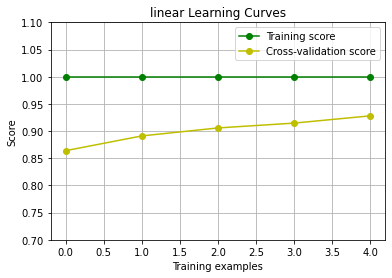

In [61]:
X,y=binary_split(basedir)
X=X[:2250]
Y = np.array([y, -(y - 1)]).T
Y=Y[:2250]
draw_learning_curves(X.reshape((2250,128*128)), list(zip(*Y))[0], SVC(kernel='linear'),5,'linear')

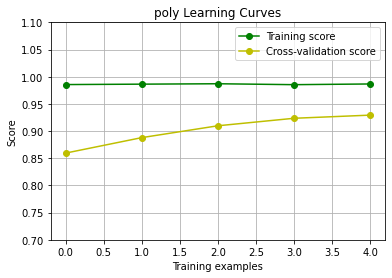

In [63]:
X,y=binary_split(basedir)
X=X[:2250]
Y = np.array([y, -(y - 1)]).T
Y=Y[:2250]
draw_learning_curves(X.reshape((2250,128*128)), list(zip(*Y))[0], SVC(kernel='poly'),5,'poly')

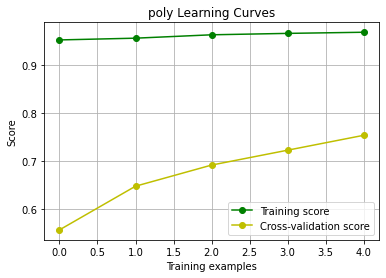

In [83]:
X,y=multiple_split(basedir)
X=X[:1000]
Y = np.array([y, -(y - 1)]).T
Y=Y[:1000]
draw_learning_curves(X.reshape((1000,128*128)), list(zip(*Y))[0], SVC(kernel='poly'),10,'poly')

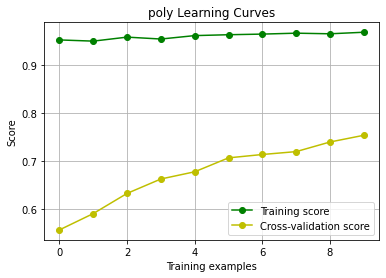

In [85]:
X,y=multiple_split(basedir)
X=X[:1000]
Y = np.array([y, -(y - 1)]).T
Y=Y[:1000]
draw_learning_curves(X.reshape((1000,128*128)), list(zip(*Y))[0], SVC(kernel='poly'),10,'poly')